In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# MNIST 데이터 셋을 추출
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(np.float32) / 255.
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(np.float32) / 255.

11493376/11490434 [==============================] - 0s 0us/step


In [15]:
# 생성자 모델 만들기
autoencoder = Sequential()

# 인코딩 부분
autoencoder.add(Conv2D(16, kernel_size = 3, padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
autoencoder.add(MaxPooling2D(2, padding = 'same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding= 'same'))
autoencoder.add(MaxPooling2D(pool_size = 2, padding = 'same'))
autoencoder.add(Conv2D(8, kernel_size = 3, strides = 2, padding='same', activation = 'relu'))

# 디코딩 부분
autoencoder.add(Conv2D(8, kernel_size = 3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size = 3, padding = 'same', activation = 'relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size = 3, activation = 'relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size = 3, padding = 'same', activation = 'sigmoid'))

# 전체 구조 확인
autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 8, 8, 8)          

In [16]:
# 컴파일 및 학습을 하는 부분
autoencoder.compile(optimizer = 'adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size = 128, validation_data = (X_test, X_test))

Epoch 1/50
469/469 [==============================] - 87s 183ms/step - loss: 0.3104 - val_loss: 0.1385
Epoch 2/50
469/469 [==============================] - 86s 183ms/step - loss: 0.1327 - val_loss: 0.1164
Epoch 3/50
469/469 [==============================] - 86s 184ms/step - loss: 0.1156 - val_loss: 0.1087
Epoch 4/50
469/469 [==============================] - 86s 183ms/step - loss: 0.1084 - val_loss: 0.1037
Epoch 5/50
469/469 [==============================] - 85s 182ms/step - loss: 0.1040 - val_loss: 0.1003
Epoch 6/50
469/469 [==============================] - 84s 180ms/step - loss: 0.1007 - val_loss: 0.0977
Epoch 7/50
469/469 [==============================] - 86s 183ms/step - loss: 0.0983 - val_loss: 0.0962
Epoch 8/50
469/469 [==============================] - 85s 182ms/step - loss: 0.0966 - val_loss: 0.0945
Epoch 9/50
469/469 [==============================] - 81s 173ms/step - loss: 0.0953 - val_loss: 0.0934
Epoch 10/50
469/469 [==============================] - 78s 167ms/step - l

In [17]:
# 학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size = 5)

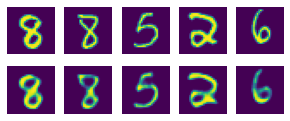

In [20]:
# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test)  # 앞서 만든 오토인코더 모델에 넣기

plt.figure(figsize = (7, 2))

for i, image_idx in enumerate(random_test):
  # 랜덤으로 뽑은 이미지를 차례로 나열
  ax = plt.subplot(2, 7, i + 1)

  # 테스트할 이미지를 먼저 그대로 보여줌
  plt.imshow(X_test[image_idx].reshape(28, 28))
  ax.axis('off')
  ax = plt.subplot(2, 7, 7 + i +1)

  # 오토인코딩 결과를 다음 열에 입력
  plt.imshow(ae_imgs[image_idx].reshape(28, 28))
  ax.axis("off")
plt.show()